Empezamos importando librerias

In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [15]:
def descompLU_recursive(A):
    """Solve (recursively) the LU decomposition of A22 − L21U12.
    :param A: numpy.matrix, real square matrix.
    :returns (l,u): (numpy.matrix, numpy.matrix), l lower triangular matrix and u upper triangular matrix."""
    #get dimensions of A
    n = A.shape[0]

    u_11 = A[0,0]
    if u_11 == 0: # whe cannot pivot anymore, the A matrix cannot be descomposed
        return (None, None)

    if n == 1:
        return np.array([[1]]), np.array([[u_11]])
    

    u_12 = A[0, 1:]

    l_21 = A[1:, 0] / u_11

    recursive_A_matrix_to_solve = A[1:, 1:] - l_21.reshape(n - 1,1) * u_12

    l_22, u_22 = descompLU_recursive(recursive_A_matrix_to_solve)
    if l_22 is None or u_22 is None: # returns canonical and original A
        return None, None
    

    l_top_row = np.array([1] + [0] * (n - 1))
    #create a new matrix using the l_22 matrix with dimensions of (n - 1, n - 1) and the l_21 matrix with dimensions of (n - 1, 1)
    l = np.hstack((np.expand_dims(l_21, axis=1), l_22))
    l = np.vstack((l_top_row, l))

    #create a new matrix using the l matrix with dimensions of (n - 1, n) and the l_top_row matrix with dimensions of (1, n)
    u_left_row = np.array([u_11] + [0] * (n - 1))
    #create a new matrix using the u_22 matrix with dimensions of (n - 1, n - 1) and the u_12 matrix with dimensions of (1, n - 1)
    u = np.vstack((u_12, u_22))
    #create a new matrix using the u matrix with dimensions of (n, n - 1) and the u_left_row matrix with dimensions of (n, 1)
    u = np.hstack((np.expand_dims(u_left_row, axis=1), u))

    return l, u

def descompLU(A):
    """Performs LU factorization of a matrix A.
    :param A: numpy.matrix, real square matrix.
    :returns (l,u): (numpy.matrix, numpy.matrix), l lower triangular matrix and u upper triangular matrix."""
    l, u = descompLU_recursive(A)
    if l is None or u is None: # returns canonical and original A
        return np.eye(A.shape[0]), A
    return l, u


In [11]:
A0 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
A1 = np.array([[ 4,3],[-5,9]])
A2 = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
A3 = np.array([[20, 10], [17, 22]])
A4 = np.array([[8, 3, -2], [-4, 7, 5], [3, 4, -12]])
A5 = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]])

def test_descompLU(test_suite):
    for test_case in test_suite:
        L1,U1 = descompLU(test_case)
        if (np.allclose(test_case, L1@U1)):
            print("OK")
        else:
            print("ERROR")
            print(L1)
            print(U1)

A_test_suite = [A0,A1,A2,A3,A4,A5]
test_descompLU(A_test_suite)

OK
OK
OK
OK
OK
OK


In [16]:
def resolverLU(A, b):
    """Returns the solution x of the system Ax = b.
    :param A: numpy.matrix, real square matrix with size = n x n.
    :param b: numpy.darray, real array with size = n x 1.
    :return: vector set of solutions."""
    l, u = descompLU(A)
    x = sp.linalg.solve_triangular(l, b, lower=True)
    return sp.linalg.solve_triangular(u, x)

In [13]:
A = np.array([[ 4,3],[-5,9]])
b = np.array([20,26])
A2 = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
b2 = np.array([25, -10, -4])
A3 = np.array([[20, 10], [17, 22]])
b3 = np.array([350, 500])
A4 = np.array([[8, 3, -2], [-4, 7, 5], [3, 4, -12]])
b4 = np.array([9, 15, 35])
A5 = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]])
b5 = np.array([2, 5, -3])

def testresolverLU(A_test_suite, b_test_suite):
    for (A_test_case, b_test_case) in zip(A_test_suite, b_test_suite):
        solucion = resolverLU(A_test_case,b_test_case)
        solucion_posta = np.linalg.solve(A_test_case,b_test_case)
        if (np.allclose(solucion, solucion_posta)):
            print("OK")
        else:
            print("ERROR")
            print(solucion)
            print(solucion_posta)

A_test_suite = [A,A2,A3,A4,A5]
b_test_suite = [b,b2,b3,b4,b5]
testresolverLU(A_test_suite,b_test_suite)

OK
OK
OK
OK
OK


In [17]:
def inversa(A):
    """Calculate the inverse of a matrix.
    :param A: numpy.matrix, real square matrix with size = n x n.
    :return: A^(-1)."""
    dimension = A.shape[0]
    canonical_matrix = np.eye(dimension)
    ret = np.zeros((dimension, dimension))

    for i in range(dimension):
        inverse_canonical_row = resolverLU(A, canonical_matrix[i])
        ret[:, i] = inverse_canonical_row

    return ret

In [15]:
A0 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
A1 = np.array([[ 4,3],[-5,9]])
A2 = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
A3 = np.array([[20, 10], [17, 22]])
A4 = np.array([[8, 3, -2], [-4, 7, 5], [3, 4, -12]])
A5 = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]])

def testinversa(test_suite):
    for test_case in test_suite:
        A_inversa = inversa(test_case)
        A_inversa_posta = np.linalg.inv(test_case)
        if (np.allclose(A_inversa_posta, A_inversa)):
            print("OK")
        else:
            print("ERROR")
            print (A_inversa)
            print (A_inversa_posta)

A_test_suite = [A0,A1,A2,A3,A4,A5]
testinversa(A_test_suite)

OK
OK
OK
OK
OK
OK


In [ ]:
iter = range(10,200)
v1 = np.array([])
v2 = np.array([])

for i in iter:
    v1_dimensional_benchmark_results = 0
    v2_dimensional_benchmark_results = 0

    for k in range(10):
        A = np.random.uniform(low=-1, high=1.0, size=(i,i))
        b = np.random.uniform(low=-1, high=1.0, size=(i,))
        x1 = resolverLU(A, b)
        x1_relative_error = np.log(np.linalg.norm(A@x1 - b) / np.linalg.norm(b))
        x2 = inversa(A)@b
        x2_relative_error = np.log(np.linalg.norm(A@x2 - b) / np.linalg.norm(b))
        v1_dimensional_benchmark_results += x1_relative_error
        v2_dimensional_benchmark_results += x2_relative_error
    
        
    v1 = np.append(v1, v1_dimensional_benchmark_results)
    v2 = np.append(v2, v2_dimensional_benchmark_results)

NameError: name 'v2' is not defined

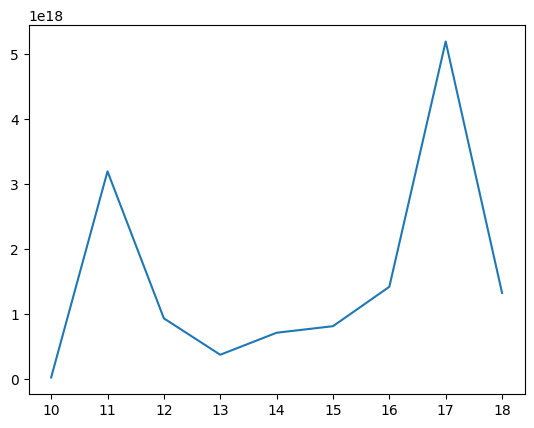

In [47]:
n = np.arange(10, len (v1))
plt.plot(n,v1[10:], label='x = Inversa(A)*b')
plt.plot(n,v2[10:], label='Resolver (LU)x=b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Errores relativos de las soluciones.')
plt.legend()
plt.show()

In [23]:
iter = range(10,200)
v1 = np.array([])
v2 = np.array([])

for i in iter:
    v1_dimensional_benchmark_results = 0
    v2_dimensional_benchmark_results = 0

    for k in range(10):
        A = np.random.uniform(low=-1, high=1.0, size=(i,i))
        b = np.random.uniform(low=-1, high=1.0, size=(i,))
        x1_i = resolverLU(A, b)
        x1 =  np.linalg.solve(A, b)
        x1_relative_error = np.log(np.linalg.norm(x1_i - x1) / np.linalg.norm(x1))
        x2_i = inversa(A)@b
        x2 =  np.linalg.inv(A)@b
        x2_relative_error = np.log(np.linalg.norm(x2_i - x2) / np.linalg.norm(x2))
        v1_dimensional_benchmark_results += x1_relative_error
        v2_dimensional_benchmark_results += x2_relative_error
    
    if(i % 10 == 0):
        print("Iteration " + str(i))
        
    v1 = np.append(v1, v1_dimensional_benchmark_results)
    v2 = np.append(v2, v2_dimensional_benchmark_results)

Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90
Iteration 100
Iteration 110
Iteration 120
Iteration 130
Iteration 140
Iteration 150
Iteration 160
Iteration 170
Iteration 180
Iteration 190


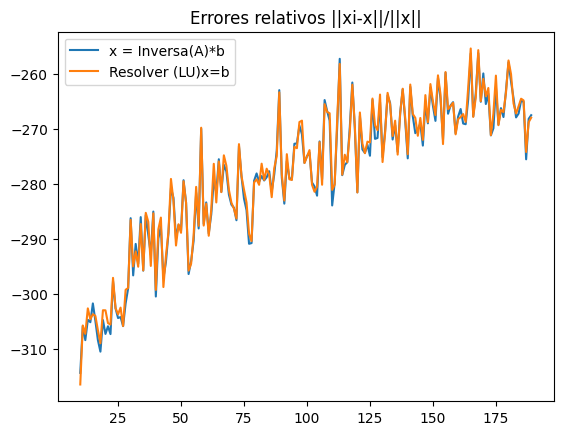

In [24]:
n = np.arange(10, len (v1))
plt.plot(n,v1[10:], label='x = Inversa(A)*b')
plt.plot(n,v2[10:], label='Resolver (LU)x=b')
plt.title('Errores relativos ||xi-x||/||x||')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Errores relativos de las soluciones.')
plt.legend()
plt.show()

In [18]:
iter = range(10,200)
v1 = np.array([])
v2 = np.array([])

for i in iter:
    v1_dimensional_benchmark_results = 0
    v2_dimensional_benchmark_results = 0

    for k in range(10):
        A = np.random.uniform(low=-1, high=1.0, size=(i,i))
        b = np.random.uniform(low=-1, high=1.0, size=(i,))
        x1 = np.linalg.solve(A, b)
        x1_relative_error = np.log(np.linalg.norm(A@x1 - b) / np.linalg.norm(b))
        x2 = np.linalg.inv(A)@b
        x2_relative_error = np.log(np.linalg.norm(A@x2 - b) / np.linalg.norm(b))
        v1_dimensional_benchmark_results += x1_relative_error
        v2_dimensional_benchmark_results += x2_relative_error
    
    if(i % 10 == 0):
        print("Iteration " + str(i))
        
    v1 = np.append(v1, v1_dimensional_benchmark_results)
    v2 = np.append(v2, v2_dimensional_benchmark_results)

Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90
Iteration 100
Iteration 110
Iteration 120
Iteration 130
Iteration 140
Iteration 150
Iteration 160
Iteration 170
Iteration 180
Iteration 190


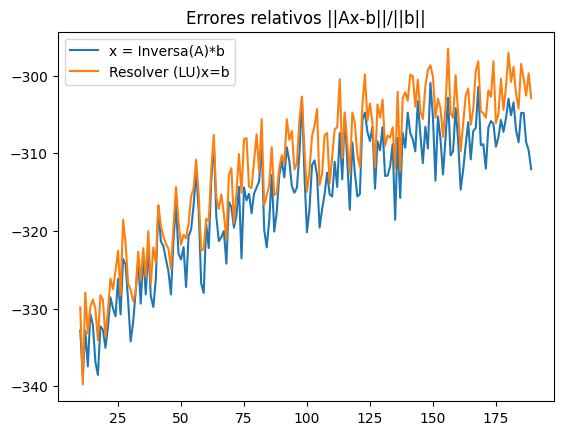

In [19]:
n = np.arange(10, len (v1))
plt.plot(n,v1[10:], label='x = Inversa(A)*b')
plt.plot(n,v2[10:], label='Resolver (LU)x=b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Errores relativos de las soluciones.')
plt.legend()
plt.show()

In [18]:
def descompPLU(A):
    n = A.shape[0]
    
    # Find the indices of the diagonal elements that are zero
    diagonal_elements = A.diagonal()
    zero_diagonal_indices = np.where(diagonal_elements == 0)[0]
    
    # Creates P, which is initially the identity matrix
    P = np.identity(n)
    
    #Find a row that does not have zeros in position i and swap them
    for i in zero_diagonal_indices:
        for j in range(i + 1, n):
            if A[j, i] != 0:
                P[[i, j]] = P[[j, i]]
                break
    
    
    pivot_A = np.dot(P, A)
    L, U = descompLU(pivot_A)  
    return P, L, U

In [19]:
np.random.seed(13121989)

matrix = np.random.uniform(-1,1,(10,10))
vector = np.random.uniform(-1,1,(10,1))

def norma_2(vector):
  norma = np.linalg.norm(vector)
  return norma

def error_relativo(A,b, sol):
  
  vector_1= np.dot(A,sol) - b
  norma_vector_1 = norma_2(vector_1)
  norma_b = norma_2(b)

  error = (norma_vector_1) / norma_b

  return  error


def test_resolver_LU(matrix, vector):

    solucion_calculada = resolverLU(matrix, vector)
    solucion_real = np.linalg.solve(matrix, vector)

    assert np.allclose(solucion_calculada, solucion_real) is True

    error = error_relativo(matrix, vector, solucion_calculada)

    print("El error relativo es: ", error)

test_resolver_LU(matrix, vector)

El error relativo es:  1.2647353438512483e-15


In [22]:
np.random.seed(13121989)

matrix = np.random.uniform(-1,1,(10,10))

def error_frobenius(A, A_inversa, I):
  
  matrix_A = np.dot(A_inversa, A) - I

  matrix_t = np.transpose(matrix_A)
  

  trace = np.trace(np.dot(matrix_t, matrix_A))

  norma = np.sqrt(trace) 
  return norma


def test_inversa(A):
    
    n = A.shape[0]
    matrix_identity = np.identity(n)

    inversa_A = inversa(A)
    inversa_calculada = np.linalg.inv(A)
   
    assert np.allclose(inversa_A, inversa_calculada) is True

    error = error_frobenius(A, inversa_A, matrix_identity)

    print("El error Frobenius es: ",  error)
    

test_inversa(matrix)



El error Frobenius es:  1.0095642421755684e-14


In [20]:
import numpy as np

def hilbert_matrix(n):
    # Inicializa una matriz de ceros de tamaño n x n
    H = np.zeros((n, n))
    
    # Rellena la matriz de Hilbert con los valores adecuados
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            H[i - 1, j - 1] = 1 / (i + j - 1)
    
    return H



In [45]:
v1 = np.array([])
for n in range(2, 21):
    A = hilbert_matrix(n)
    num_cond =  np.linalg.cond(A, p=2)
    v1 = np.append(v1,num_cond)
    

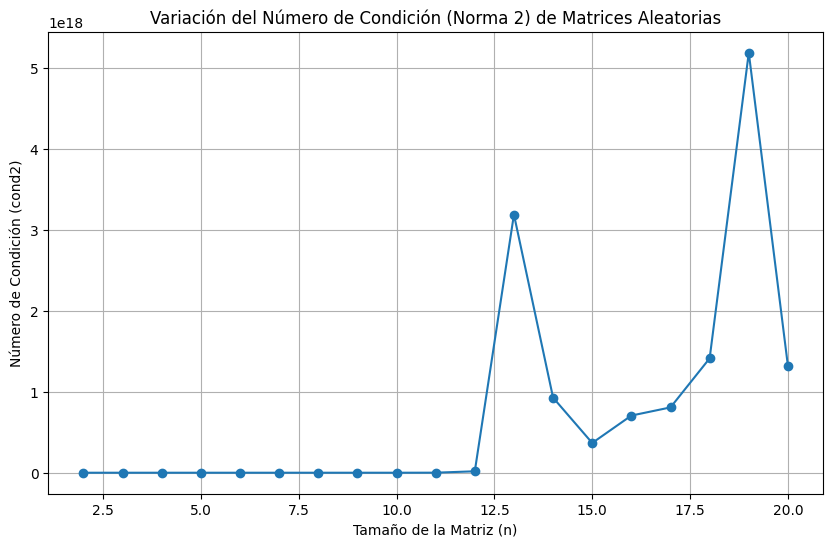

In [46]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), v1, marker='o', linestyle='-')
plt.title('Variación del Número de Condición (Norma 2) de Matrices Aleatorias')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Número de Condición (cond2)')
plt.grid(True)
plt.show()